In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [3]:
# 간단한 머신러닝 구현
import sklearn
print(sklearn.__version__)

0.22.1


In [4]:
# 1. 데이터 로딩
iris = load_iris()
print(type(iris))
# iris.head()  -> impossible : 타입이 다르기 때문

sklearn.utils.Bunch

In [6]:
keys = iris.keys()
print('dataset keys: ', keys)
# target : 정답(숫자로 구성), target_names : 이름, DESCR : 피쳐 설명

dataset keys:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
print('key data\n', iris.data)
print('*'*50)
print('key target\n', iris.target)
print('*'*50)
print('key target_names\n', iris.target_names)
print('*'*50)
print('key DESCR\n', iris.DESCR)
print('*'*50)
print('key feature_names\n', iris.feature_names)
print('*'*50)
print('key filename\n', iris.filename)

key data
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [

In [13]:
# feature 데이터셋 확인
iris_data = iris.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
# 레이블(결정값/ 타켓/ 클래스) 확인
iris_label = iris.target
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
# 데이터 프레임 변환
iris_df = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_df['target'] = iris_label
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=20)
print('train data\n', X_train)
print('train label\n', y_train)
print('test data\n', X_test)
print('test label\n', y_test)

train data
 [[5.7 3.  4.2 1.2]
 [5.6 3.  4.1 1.3]
 [5.1 3.5 1.4 0.2]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [4.9 2.5 4.5 1.7]
 [6.  3.4 4.5 1.6]
 [4.9 3.  1.4 0.2]
 [6.4 3.2 4.5 1.5]
 [7.4 2.8 6.1 1.9]
 [5.7 2.8 4.5 1.3]
 [6.1 2.6 5.6 1.4]
 [4.9 3.6 1.4 0.1]
 [6.7 3.1 4.4 1.4]
 [6.3 3.3 4.7 1.6]
 [4.7 3.2 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.  3.3 1.4 0.2]
 [5.7 2.5 5.  2. ]
 [5.1 3.8 1.9 0.4]
 [6.4 2.8 5.6 2.2]
 [6.2 3.4 5.4 2.3]
 [5.4 3.4 1.5 0.4]
 [6.3 3.3 6.  2.5]
 [6.  2.2 4.  1. ]
 [5.6 2.9 3.6 1.3]
 [5.6 3.  4.5 1.5]
 [4.5 2.3 1.3 0.3]
 [5.1 3.4 1.5 0.2]
 [5.5 2.4 3.8 1.1]
 [6.2 2.9 4.3 1.3]
 [5.8 2.6 4.  1.2]
 [5.6 2.5 3.9 1.1]
 [6.7 3.1 4.7 1.5]
 [6.5 2.8 4.6 1.5]
 [5.7 2.9 4.2 1.3]
 [5.1 3.3 1.7 0.5]
 [6.2 2.2 4.5 1.5]
 [6.3 2.3 4.4 1.3]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.4 3.  4.5 1.5]
 [5.5 2.3 4.  1.3]
 [6.1 3.  4.6 1.4]
 [5.1 3.8 1.5 0.3]
 [5.3 3.7 1.5 0.2]
 [6.4 3.2 5.3 2.3]
 [5.5 3.5 1.3 0.2]
 [4.8 3.1 1.6 0.2]
 [5.  2.  3.5 1. ]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]


In [27]:
# 학습을 위한 알고리즘(학습기)
iris_dtc = DecisionTreeClassifier(random_state=20)
iris_dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

In [28]:
# 예측(Prediction) 수행
prediction = iris_dtc.predict(X_test)
print('y_test\n', y_test)
print('prediction\n', prediction)

y_test
 [0 1 1 2 1 1 2 0 2 0 2 1 2 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 2]
prediction
 [0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 1]


In [37]:
# 예측 정확도 평가
from sklearn.metrics import accuracy_score
print('예측 정확도 :',accuracy_score(y_test, prediction))

예측 정확도 : 0.9333333333333333


In [38]:
# 데이터 프레임 형태 활용 방법
iris_df = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_df['target'] = iris_label
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
# 피처와 레이블 나누기
feature_df = iris_df.iloc[:,:-1]
label_df = iris_df.iloc[:,-1]
display(feature_df)
display(label_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [48]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=11)
print('train data\n', X_train)
print('train label\n', y_train)
print('test data\n', X_test)
print('test label\n', y_test)
print(type(X_train), type(X_test), type(y_train), type(y_test))

train data
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
120                6.9               3.2                5.7               2.3
122                7.7               2.8                6.7               2.0
49                 5.0               3.3                1.4               0.2
29                 4.7               3.2                1.6               0.2
..                 ...               ...                ...               ...
76                 6.8               2.8                4.8               1.4
13                 4.3               3.0                1.1               0.1
81                 5.5               2.4                3.7               1.0
91                 6.1               3.0                4.6               1.4
80                 5.5               2.4                3.8               1.1

[120 rows x 4 columns]
train label
 0      0
120   

In [50]:
# 학습을 위한 알고리즘(학습기)
iris_dtc = DecisionTreeClassifier(random_state=20, criterion='gini')
iris_dtc.fit(X_train, y_train)

# 예측(Prediction) 수행
prediction = iris_dtc.predict(X_test)
print('y_test\n', y_test)
print('prediction\n', prediction)

# 예측 정확도 평가
from sklearn.metrics import accuracy_score
print('예측 정확도 :',accuracy_score(y_test, prediction))

y_test
 112    2
145    2
133    2
56     1
111    2
9      0
65     1
15     0
30     0
63     1
119    2
62     1
84     1
113    2
139    2
41     0
103    2
66     1
110    2
142    2
69     1
2      0
22     0
51     1
12     0
11     0
149    2
75     1
16     0
85     1
Name: target, dtype: int32
prediction
 [2 2 1 2 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 2]
예측 정확도 : 0.8666666666666667


In [51]:
# 학습을 시킬 때 테스트 데이터 세트를 이용하지 않고 학습 데이터만으로 예측한다면?

# 데이터 세트 분할없이 가져오기
bad_iris = load_iris()
train_data = bad_iris.data
train_label = bad_iris.target

# 학습을 위한 분류 모델
bad_iris_clf = DecisionTreeClassifier()
bad_iris_clf.fit(train_data, train_label)

# 잘못된 예측
pred = bad_iris_clf.predict(train_data)
print('예측 정확도: ', accuracy_score(train_label, pred))

예측 정확도:  1.0


### 교차 검증 (Cross Validation)
- KFold 방식

In [52]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

import pandas as pd
import numpy as np

In [55]:
fold_iris = load_iris()
features = fold_iris.data
labels = fold_iris.target

fold_df_clf = DecisionTreeClassifier()

In [56]:
# 5개의 폴드 세트를 분리하여 각 폴드 세트별 정확도를 담을 리스트 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('iris shape: ', features.shape)

iris shape:  (150, 4)


In [66]:
n_iter = 0

for train_idx, test_idx in kfold.split(features):
   #  print(train_idx, test_idx)
    X_train, X_test = features[train_idx], features[test_idx]
    # print(X_test)
    
    y_train, y_test = labels[train_idx], labels[test_idx]
    # print(y_test)
    
    # 학습을 진행
    fold_df_clf.fit(X_train, y_train)
    
    # 예측
    fold_pred = fold_df_clf.predict(X_test)
    
    # 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, fold_pred), 4)
    print('\n{} 교차검증 정확도: {}, 학습 데이터 크기 : {}, 검증 데이터 크기 : {}'.format(n_iter,accuracy, X_train.shape[0], X_test.shape[0]))
    cv_accuracy.append(accuracy)
    
print('\n 평균검증 정확도: ', np.mean(cv_accuracy))


1 교차검증 정확도: 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

2 교차검증 정확도: 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

3 교차검증 정확도: 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

4 교차검증 정확도: 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

5 교차검증 정확도: 0.7667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

 평균검증 정확도:  0.9133400000000002


- Stratified KFold : 불균형한 분포도를 가진 레이블 데이터 집합을 위한 KFold 방식
    - 레이블의 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트로 분할
    - 분류 분석에서만 사용 가능

In [67]:
# 기존 KFold의 문제점 다시 한번 확인
kfold_iris_data = load_iris()

In [70]:
# print("\n", kfold_iris_data)
kfold_iris_data_df = pd.DataFrame(data=kfold_iris_data.data, columns=kfold_iris_data.feature_names)
kfold_iris_data_df['target'] = kfold_iris_data.target
print('vale_counts: \n', kfold_iris_data_df['target'].value_counts())

vale_counts: 
 2    50
1    50
0    50
Name: target, dtype: int64


In [71]:
kfold_iris_data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [85]:
kfold_iris = KFold(n_splits=3)
cnt_iter = 0

for train_idx, test_idx in kfold_iris.split(kfold_iris_data_df):
    # print(train_idx, test_idx)
    cnt_iter += 1
    label_train = kfold_iris_data_df['target'].iloc[train_idx]
    label_test = kfold_iris_data_df['target'].iloc[test_idx]
    # print(label_test)
    print('교차검증: {}'.format(cnt_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())
    

교차검증: 1
학습 레이블 데이터 분포: 
 2    50
1    50
Name: target, dtype: int64
검증 레이블 데이터 분포: 
 0    50
Name: target, dtype: int64
교차검증: 2
학습 레이블 데이터 분포: 
 2    50
0    50
Name: target, dtype: int64
검증 레이블 데이터 분포: 
 1    50
Name: target, dtype: int64
교차검증: 3
학습 레이블 데이터 분포: 
 1    50
0    50
Name: target, dtype: int64
검증 레이블 데이터 분포: 
 2    50
Name: target, dtype: int64


In [86]:
# 레이블 값의 분포 반영하기 위한 StratifiedKFold 방식 사용
from sklearn.model_selection import StratifiedKFold

In [87]:
skfold_iris = StratifiedKFold(n_splits=3)
cnt_iter = 0

for train_idx, test_idx in skfold_iris.split(kfold_iris_data_df, kfold_iris_data_df['target']):
    # print(train_idx, test_idx)
    cnt_iter += 1
    label_train = kfold_iris_data_df['target'].iloc[train_idx]
    label_test = kfold_iris_data_df['target'].iloc[test_idx]
    # print(label_test)
    print('교차검증: {}'.format(cnt_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())

교차검증: 1
학습 레이블 데이터 분포: 
 2    34
1    33
0    33
Name: target, dtype: int64
검증 레이블 데이터 분포: 
 1    17
0    17
2    16
Name: target, dtype: int64
교차검증: 2
학습 레이블 데이터 분포: 
 1    34
2    33
0    33
Name: target, dtype: int64
검증 레이블 데이터 분포: 
 2    17
0    17
1    16
Name: target, dtype: int64
교차검증: 3
학습 레이블 데이터 분포: 
 0    34
2    33
1    33
Name: target, dtype: int64
검증 레이블 데이터 분포: 
 2    17
1    17
0    16
Name: target, dtype: int64


In [96]:
# 붓꽃 데이터 세트에서 Stratified KFold를 이용하여 교차검증을 진행하고 평균 정확도 확인(random state=100)
cv_accuracy=[]

skfold_iris = StratifiedKFold(n_splits=3)
cnt_iter = 0

for train_idx, test_idx in skfold_iris.split(kfold_iris_data_df, kfold_iris_data_df['target']):
    # print(train_idx, test_idx)
    cnt_iter += 1
    features_train = kfold_iris_data_df.iloc[:,:-1].iloc[train_idx]
    features_test = kfold_iris_data_df.iloc[:,:-1].iloc[test_idx]
    # print(features_train)
    label_train = kfold_iris_data_df['target'].iloc[train_idx]
    label_test = kfold_iris_data_df['target'].iloc[test_idx]
    # print(label_test)
    
    # 학습을 진행
    clf = DecisionTreeClassifier(random_state=100)
    clf.fit(features_train, label_train)
    
    # 예측
    pred = clf.predict(features_test)
    
    # 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(label_test, pred), 4)
    print('\n{} 교차검증 정확도: {}, 학습 데이터 크기 : {}, 검증 데이터 크기 : {}'.format(n_iter,accuracy, X_train.shape[0], X_test.shape[0]))
    cv_accuracy.append(accuracy)
    
print('\n 평균검증 정확도: ', np.mean(cv_accuracy))


9 교차검증 정확도: 0.98, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

10 교차검증 정확도: 0.92, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

11 교차검증 정확도: 0.96, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

 평균검증 정확도:  0.9533333333333333


### 교차검증을 간단하게 도와주는 함수 : cross_val_score()
1. 폴더 세트 설정
2. 반복을 통한 학습 및 테스트
3. 인덱스 추출, 학습과 예측 진행

    - cross_val_score(estimater(학습 추정기 선택), X(features), y(label), scoring(오차 평가지표), cv(폴더 셋))

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
import pandas as pd
import numpy as np

In [2]:
cvs_iris = load_iris()
cvs_iris_feature = cvs_iris.data
cvs_iris_label = cvs_iris.target

cvs_iris_dtc = DecisionTreeClassifier(random_state = 200)

In [14]:
# scoring = cross_val_score(cvs_iris_dtc, cvs_iris_feature, cvs_iris_label, scoring='accuracy', cv=3)
scoring = cross_validate(cvs_iris_dtc, cvs_iris_feature, cvs_iris_label, scoring='accuracy', cv=5)

In [15]:
print('교차 검증별 정확도: ',scoring)
print('평균 검증 정확도: ', np.mean(scoring['test_score']))

교차 검증별 정확도:  {'fit_time': array([0.00299788, 0.00301027, 0.00200057, 0.00099778, 0.00099993]), 'score_time': array([0.00099993, 0.00198531, 0.        , 0.00099874, 0.00102043]), 'test_score': array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])}
평균 검증 정확도:  0.9666666666666668


### Hyper Parameter Tuning(하이퍼 파라미터 튜닝)
- GridSearchCV -> 교차검증, 튜닝을 한번에 할 수 있다.
- Decision Tree parameter
    - parameter criterion : 노드 분리하는 기준(gini, entropy)
    - parameter splitter : 노드 분리하는 방법(random, best)
    - parameter max_depth : 트리 모형의 깊이를 의미
    - parameter min_samples_split : 브랜치 노드에서 분리가 일어나기 위한 sample의 수
    - parameter min_samples_leaf : 더 이상 나눠지지 않는 노드의 개수/ 노드에 필요한 최소한의 샘플 수
    - parameter max_features : 노드를 분리할 때 고려하는 속성의 수(auto, sqrt, log, int, float)
    - random_state

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [22]:
gscv_iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(gscv_iris.data, gscv_iris.target, test_size=0.2, random_state=120)
gscv_tree = DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 'splitter': ['random','best'], 'max_depth': [1,2,3], 'min_samples_split': [2,3]}

In [23]:
# refit=True : 최적의 하이퍼 파라미터를 찾아 재학습을 하겠다는 의미
grid_gscv_tree=GridSearchCV(gscv_tree, param_grid=params, cv=3, refit=True)

In [28]:
# 학습
grid_gscv_tree.fit(X_train, y_train)
grid_gscv_tree.cv_results_
scores_df = pd.DataFrame(grid_gscv_tree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,17,0.675,0.675,0.650
1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,17,0.675,0.675,0.650
2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.633333,24,0.575,0.675,0.650
3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,17,0.675,0.675,0.650
4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.791667,14,0.875,0.725,0.775
5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.908333,9,0.950,0.900,0.875
6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.875000,13,0.875,0.850,0.900
7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.908333,9,0.950,0.900,0.875
8,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.933333,3,0.875,0.950,0.975
9,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.933333,3,0.950,0.875,0.975


In [31]:
print('최적의 파라미터: ', grid_gscv_tree.best_params_)
print('높은 정확도 : ', grid_gscv_tree.best_score_)

최적의 파라미터:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'best'}
높은 정확도 :  0.9416666666666668


In [35]:
estimator = grid_gscv_tree.best_estimator_
prediction = estimator.predict(X_test)
print('테스트 세트의 정확도: ',accuracy_score(y_test, prediction))

테스트 세트의 정확도:  1.0


In [2]:
# 실습
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [45]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# train, test 7:3 나누기 -> 학습 -> 예측 -> 정확도 -> 교차검증 -> 튜닝
from sklearn.model_selection import KFold

In [48]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=20)

cancer_dtc = DecisionTreeClassifier(random_state=20)

cancer_dtc.fit(X_train, y_train)

pre_cancer = cancer_dtc.predict(X_test)
print('예측값 : ', pre_cancer)
print('테스트 데이터 값 : ', y_test)

accuracy_score(y_test, pre_cancer)

예측값 :  [1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0
 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0]
테스트 데이터 값 :  [1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0
 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1
 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0]


0.9181286549707602

In [57]:
cancer_kfold = KFold(n_splits=10)
cancer_dtf = DecisionTreeClassifier(random_state=20)

cv_accuracy=[]

for train_idx, test_idx in cancer_kfold.split(cancer.data):
    # print(train_idx, test_idx)
    X_train, X_test = cancer.data[train_idx], cancer.data[test_idx]
    
    y_train, y_test = cancer.target[train_idx], cancer.target[test_idx]
    
    cancer_dtf.fit(X_train, y_train)
    
    # 예측
    fold_pred = cancer_dtf.predict(X_test)
    
    # 정확도 측정
    accuracy = np.round(accuracy_score(y_test, fold_pred), 4)
    cv_accuracy.append(accuracy)
print(cv_accuracy)
print(np.mean(cv_accuracy))

[0.8947, 0.9123, 0.8772, 0.9649, 0.9298, 0.9825, 0.9123, 0.9649, 0.9474, 0.875]
0.9260999999999999


In [59]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=20)

cancer_dtf = DecisionTreeClassifier(random_state=20)

params = {'criterion':['gini', 'entropy'], 'splitter': ['random','best'], 'max_depth': [1,2,3], 'min_samples_split': [2,3]}
grid_cancer=GridSearchCV(cancer_dtf, param_grid=params, cv=3, refit=True)
grid_cancer.fit(X_train, y_train)
grid_cancer.cv_results_

print('최적의 파라미터: ', grid_gscv_tree.best_params_)
print('높은 정확도 : ', grid_gscv_tree.best_score_)

최적의 파라미터:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'best'}
높은 정확도 :  0.9416666666666668


### 불순도를 이용한 분류
- criterion (지니/ 엔트로피/ 분류오류)


In [11]:
criterion_iris = load_iris()
X = criterion_iris.data[:, [2,3]]
y = criterion_iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler

# X_train 평균과 표준편차를 구하기 위해서 표준화
sc = StandardScaler() # 표준정규화 함수를 부여
sc.fit(X_train) # x_train의 평균과 표준편차를 사용하겠다 라는함수

X_train_std = sc.transform(X_train) # training 데이터의 표준화
X_test_std = sc.transform(X_test) # test 데이터의 표준화

In [17]:
creterion_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
creterion_dtc.fit(X_train_std, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [22]:
y_pred = creterion_dtc.predict(X_test_std)
print('총 테스트 개수 : %d, 오류 개수 : %d' % ( len(y_test), (y_test != y_pred).sum()))
print('정확도 : % .2f' % accuracy_score(y_test, y_pred))

총 테스트 개수 : 45, 오류 개수 : 1
정확도 :  0.98


In [28]:
# 2차원 배열은 병합
# np.vstack, np.hstack

a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
c = np.hstack([a,b])
d = np.vstack([a,b])
print(c)

print(d)

[[1 2 5 6]
 [3 4 7 8]]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [31]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

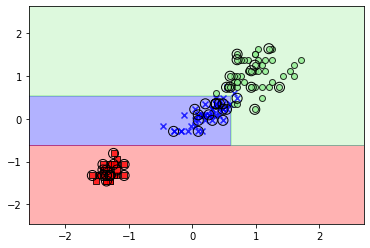

In [39]:
# 불순도 검사
X_combind_std = np.vstack((X_train_std, X_test_std))
y_combind = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combind_std, y=y_combind, classifier=creterion_dtc, test_idx=range(105,150))